<a href="https://colab.research.google.com/github/mheuristicsApps/An-overview-of-fundamentals-and-applications-of-Particle-Swarm-Optimization/blob/main/Adaptive_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptive PSO 

Best solution found: [-0.14253618  0.37685968] with score: 0.1623397790902839


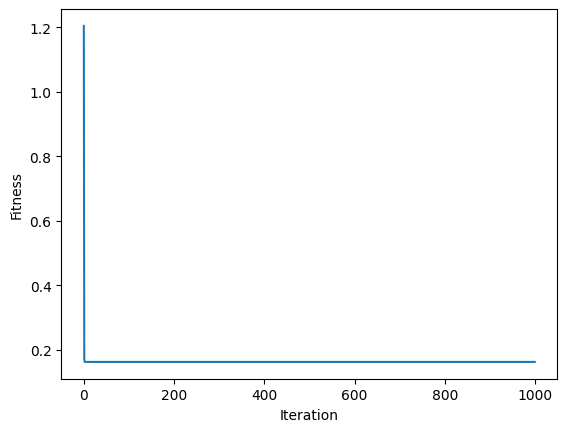

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ObjectiveFunction:
    def __init__(self, dim):
        self.dim = dim

    def evaluate(self, x):
        return np.sum(x ** 2)

class APSO:
    def __init__(self, obj_fn, num_particles=50, max_iterations=1000, w=0.729, c1=1.49445, c2=1.49445, tau1=0.4, tau2=0.1):
        self.obj_fn = obj_fn
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.tau1 = tau1
        self.tau2 = tau2

    def optimize(self):
        # Initialize particles
        swarm = np.random.uniform(-5, 5, size=(self.num_particles, self.obj_fn.dim))
        velocity = np.zeros_like(swarm)
        pbest_pos = swarm.copy()
        pbest_score = np.full(self.num_particles, np.inf)
        gbest_pos = swarm[0]
        gbest_score = np.inf

        # Main loop
        convergence_curve = []
        for i in range(self.max_iterations):
            r1, r2 = np.random.rand(2, self.num_particles, self.obj_fn.dim)
            velocity = self.w * velocity + self.c1 * r1 * (pbest_pos - swarm) + self.c2 * r2 * (gbest_pos - swarm)
            swarm = swarm + velocity

            # Enforce bounds
            swarm = np.clip(swarm, -5, 5)

            # Evaluate fitness
            scores = np.apply_along_axis(self.obj_fn.evaluate, 1, swarm)

            # Update personal best
            improved = scores < pbest_score
            pbest_score[improved] = scores[improved]
            pbest_pos[improved] = swarm[improved]

            # Update global best
            best_idx = np.argmin(pbest_score)
            if pbest_score[best_idx] < gbest_score:
                gbest_score = pbest_score[best_idx]
                gbest_pos = pbest_pos[best_idx]

            # Update parameters
            self.w *= self.tau1
            self.c1 *= self.tau2
            self.c2 *= self.tau2

            convergence_curve.append(gbest_score)

        return gbest_pos, gbest_score, convergence_curve

if __name__ == '__main__':
    obj_fn = ObjectiveFunction(dim=2)
    apso = APSO(obj_fn)
    best_pos, best_score, convergence = apso.optimize()
    print(f"Best solution found: {best_pos} with score: {best_score}")

    plt.plot(convergence)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.show()